### Installing Required Libraries

In [1]:
%pip install numpy pandas matplotlib seaborn ipython jupyterlab Pillow pyscreenshot tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Alejo\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from datetime import datetime

### Processing NFL Datasets

In [3]:
game_data = pd.read_csv('../NFLData/games.csv')
pff_scouting_data = pd.read_csv('../NFLData/pffScoutingData.csv')
player_data = pd.read_csv('../NFLData/players.csv')
play_data = pd.read_csv('../NFLData/plays.csv')
tracking_w1_data = pd.read_csv('../NFLData/week1.csv')
tracking_w2_data = pd.read_csv('../NFLData/week2.csv')
tracking_w3_data = pd.read_csv('../NFLData/week3.csv')
tracking_w4_data = pd.read_csv('../NFLData/week4.csv')
tracking_w5_data = pd.read_csv('../NFLData/week5.csv')
tracking_w6_data = pd.read_csv('../NFLData/week6.csv')
tracking_w7_data = pd.read_csv('../NFLData/week7.csv')
tracking_w8_data = pd.read_csv('../NFLData/week8.csv')

### Displaying Nan Values In Pandas Dataframes

In [4]:
nan_values = game_data.isna().sum()
print("-- Game Data Nan Values --")
print(nan_values)

nan_values = pff_scouting_data.isna().sum()
print("-- PFF Scouting Data Nan Values --")
print(nan_values)

nan_values = player_data.isna().sum()
print("-- Player Data Nan Values --")
print(nan_values)

nan_values = play_data.isna().sum()
print("-- Play Data Nan Values --")
print(nan_values)



-- Game Data Nan Values --
gameId             0
season             0
week               0
gameDate           0
gameTimeEastern    0
homeTeamAbbr       0
visitorTeamAbbr    0
dtype: int64
-- PFF Scouting Data Nan Values --
gameId                         0
playId                         0
nflId                          0
pff_role                       0
pff_positionLinedUp            0
pff_hit                    94127
pff_hurry                  94127
pff_sack                   94127
pff_beatenByDefender      140167
pff_hitAllowed            140167
pff_hurryAllowed          140167
pff_sackAllowed           140167
pff_nflIdBlockedPlayer    141728
pff_blockType             140350
pff_backFieldBlock        140351
dtype: int64
-- Player Data Nan Values --
nflId                 0
height                0
weight                0
birthDate           232
collegeName         224
officialPosition      0
displayName           0
dtype: int64
-- Play Data Nan Values --
gameId                       0
pl

### Displaying Nan Values In Tracking Dataframes

In [5]:
nan_values = tracking_w1_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w2_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w3_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w4_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w5_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w6_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w7_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

nan_values = tracking_w8_data.isna().sum()
print("-- Tracking Week 1 Data Nan Values --")
print(nan_values)

-- Tracking Week 1 Data Nan Values --
gameId               0
playId               0
nflId            48614
frameId              0
time                 0
jerseyNumber     48614
team                 0
playDirection        0
x                    0
y                    0
s                    0
a                    0
dis                  0
o                48614
dir              48614
event                0
dtype: int64
-- Tracking Week 1 Data Nan Values --
gameId               0
playId               0
nflId            45338
frameId              0
time                 0
jerseyNumber     45338
team                 0
playDirection        0
x                    0
y                    0
s                    0
a                    0
dis                  0
o                45338
dir              45338
event                0
dtype: int64
-- Tracking Week 1 Data Nan Values --
gameId               0
playId               0
nflId            48775
frameId              0
time                 0
jerseyNum

### Displaying Game Data Format

In [6]:
print("-- Printing first 5 rows --\n\n")
print(game_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(game_data.columns)

-- Printing first 5 rows --


       gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0  2021090900    2021     1  09/09/2021        20:20:00           TB   
1  2021091200    2021     1  09/12/2021        13:00:00          ATL   
2  2021091201    2021     1  09/12/2021        13:00:00          BUF   
3  2021091202    2021     1  09/12/2021        13:00:00          CAR   
4  2021091203    2021     1  09/12/2021        13:00:00          CIN   

  visitorTeamAbbr  
0             DAL  
1             PHI  
2             PIT  
3             NYJ  
4             MIN  


-- Printing Columns --


Index(['gameId', 'season', 'week', 'gameDate', 'gameTimeEastern',
       'homeTeamAbbr', 'visitorTeamAbbr'],
      dtype='object')


### Displaying PFF Scouting Data Format

In [7]:
print("-- Printing first 5 rows --\n\n")
print(pff_scouting_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(pff_scouting_data.columns)

-- Printing first 5 rows --


       gameId  playId  nflId    pff_role pff_positionLinedUp  pff_hit  \
0  2021090900      97  25511        Pass                  QB      NaN   
1  2021090900      97  35481  Pass Route                TE-L      NaN   
2  2021090900      97  35634  Pass Route                 LWR      NaN   
3  2021090900      97  39985  Pass Route                HB-R      NaN   
4  2021090900      97  40151  Pass Block                   C      NaN   

   pff_hurry  pff_sack  pff_beatenByDefender  pff_hitAllowed  \
0        NaN       NaN                   NaN             NaN   
1        NaN       NaN                   NaN             NaN   
2        NaN       NaN                   NaN             NaN   
3        NaN       NaN                   NaN             NaN   
4        NaN       NaN                   0.0             0.0   

   pff_hurryAllowed  pff_sackAllowed  pff_nflIdBlockedPlayer pff_blockType  \
0               NaN              NaN                     NaN        

### Displaying Player Data Format

In [8]:
print("-- Printing first 5 rows --\n\n")
print(player_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(player_data.columns)

-- Printing first 5 rows --


   nflId height  weight   birthDate collegeName officialPosition  \
0  25511    6-4     225  1977-08-03    Michigan               QB   
1  28963    6-5     240  1982-03-02   Miami, O.               QB   
2  29550    6-4     328  1982-01-22    Arkansas                T   
3  29851    6-2     225  1983-12-02  California               QB   
4  30078    6-2     228  1982-11-24     Harvard               QB   

          displayName  
0           Tom Brady  
1  Ben Roethlisberger  
2        Jason Peters  
3       Aaron Rodgers  
4    Ryan Fitzpatrick  


-- Printing Columns --


Index(['nflId', 'height', 'weight', 'birthDate', 'collegeName',
       'officialPosition', 'displayName'],
      dtype='object')


### Displaying Play Data Format

In [9]:
print("-- Printing first 5 rows --\n\n")
print(play_data.head(5))
print("\n\n-- Printing Columns --\n\n")
print(play_data.columns)

-- Printing first 5 rows --


       gameId  playId                                    playDescription  \
0  2021090900      97  (13:33) (Shotgun) T.Brady pass incomplete deep...   
1  2021090900     137  (13:18) (Shotgun) D.Prescott pass deep left to...   
2  2021090900     187  (12:23) (Shotgun) D.Prescott pass short middle...   
3  2021090900     282  (9:56) D.Prescott pass incomplete deep left to...   
4  2021090900     349  (9:46) (Shotgun) D.Prescott pass incomplete sh...   

   quarter  down  yardsToGo possessionTeam defensiveTeam yardlineSide  \
0        1     3          2             TB           DAL           TB   
1        1     1         10            DAL            TB          DAL   
2        1     2          6            DAL            TB          DAL   
3        1     1         10            DAL            TB           TB   
4        1     3         15            DAL            TB           TB   

   yardlineNumber  ... foulNFLId3  absoluteYardlineNumber  offenseFormatio

### Displaying Tracking Data Format (Week 1)

Here we identify rows with a particular frameId for a ball_snap event. How do we want to standardize the sequences? Do we drop all but 1 frame before the ball_snap?

In [10]:
print("-- Printing first 5 rows --\n\n")
print(tracking_w1_data.head(20))
print("\n\n-- Printing Columns --\n\n")
print(tracking_w1_data.columns)
print("\n\n-- Printing Number of Ball Snap Events -- \n\n")
print(tracking_w1_data.loc[(tracking_w1_data["event"] == "ball_snap") & (tracking_w1_data["frameId"] > 20)].shape[0])

-- Printing first 5 rows --


        gameId  playId    nflId  frameId                     time  \
0   2021090900      97  25511.0        1  2021-09-10T00:26:31.100   
1   2021090900      97  25511.0        2  2021-09-10T00:26:31.200   
2   2021090900      97  25511.0        3  2021-09-10T00:26:31.300   
3   2021090900      97  25511.0        4  2021-09-10T00:26:31.400   
4   2021090900      97  25511.0        5  2021-09-10T00:26:31.500   
5   2021090900      97  25511.0        6  2021-09-10T00:26:31.600   
6   2021090900      97  25511.0        7  2021-09-10T00:26:31.700   
7   2021090900      97  25511.0        8  2021-09-10T00:26:31.800   
8   2021090900      97  25511.0        9  2021-09-10T00:26:31.900   
9   2021090900      97  25511.0       10  2021-09-10T00:26:32.000   
10  2021090900      97  25511.0       11  2021-09-10T00:26:32.100   
11  2021090900      97  25511.0       12  2021-09-10T00:26:32.200   
12  2021090900      97  25511.0       13  2021-09-10T00:26:32.300   
13  

### Data Cleaning

Here we print the Nan values found in the Pandas Dataframe from the Week 1 tracking dataset. We can see that there are ~48 thousand rows with required data missing, and therefore we clean our data from dropping these values from our dataframe.

In [11]:
## See Empty Values and Clean Data

nan_values = tracking_w1_data.isna().sum()
print(nan_values)
print("\n\nPrinting out Nan values below...\n\n")
print(tracking_w1_data[tracking_w1_data.isna().any(axis=1)])

tracking_w1_data= tracking_w1_data.dropna()



gameId               0
playId               0
nflId            48614
frameId              0
time                 0
jerseyNumber     48614
team                 0
playDirection        0
x                    0
y                    0
s                    0
a                    0
dis                  0
o                48614
dir              48614
event                0
dtype: int64


Printing out Nan values below...


             gameId  playId  nflId  frameId                     time  \
946      2021090900      97    NaN        1  2021-09-10T00:26:31.100   
947      2021090900      97    NaN        2  2021-09-10T00:26:31.200   
948      2021090900      97    NaN        3  2021-09-10T00:26:31.300   
949      2021090900      97    NaN        4  2021-09-10T00:26:31.400   
950      2021090900      97    NaN        5  2021-09-10T00:26:31.500   
...             ...     ...    ...      ...                      ...   
1118117  2021091300    4845    NaN       30  2021-09-14T03:54:20.600   
111811

### Displaying Nan Values After Removal

Here we provide evidence of no Nan values remaining in our dataset.

In [12]:
### Seeing remaining nan values

nan_values = tracking_w1_data.isna().sum()
print(nan_values)
print("\n\nPrinting out Nan values below...\n\n")
print(tracking_w1_data[tracking_w1_data.isna().any(axis=1)])

gameId           0
playId           0
nflId            0
frameId          0
time             0
jerseyNumber     0
team             0
playDirection    0
x                0
y                0
s                0
a                0
dis              0
o                0
dir              0
event            0
dtype: int64


Printing out Nan values below...


Empty DataFrame
Columns: [gameId, playId, nflId, frameId, time, jerseyNumber, team, playDirection, x, y, s, a, dis, o, dir, event]
Index: []


### Encoding Categorical Data

In our tracking dataset we identify 3 categorical columns (team,playDirection,event) with string values. For each of these columns, we will create an encoded dictionary that holds the corresponding numerical values for each unique category found in each of those columns.

In [13]:
# Encoding categorical data

categorical_data = ["team","playDirection","event"]
category_codes = {}

w1_data_copy = tracking_w1_data.copy()

for i in tracking_w1_data:
    if i in categorical_data:
        specific_codes = {}
        tracking_w1_data[i] = tracking_w1_data[i].astype("category")
        tracking_w1_data[i] = tracking_w1_data[i].cat.codes
        coded = tracking_w1_data[i].unique()#
        count = 0
        for j in w1_data_copy[i].unique():
           specific_codes[j] = coded[count]
           count += 1
        category_codes[i] = specific_codes

for i in category_codes:
  print("{} -".format(i))
  for j in category_codes[i]:
    print("{}: {}".format(j, category_codes[i][j]))


team -
TB: 29
DAL: 8
ATL: 1
PHI: 25
PIT: 26
BUF: 3
NYJ: 24
CAR: 4
MIN: 20
CIN: 6
SF: 28
DET: 10
HOU: 12
JAX: 14
SEA: 27
IND: 13
TEN: 30
ARI: 0
LAC: 17
WAS: 31
CLE: 7
KC: 15
MIA: 19
NE: 21
NO: 22
GB: 11
DEN: 9
NYG: 23
CHI: 5
LA: 16
BAL: 2
LV: 18
playDirection -
right: 1
left: 0
event -
None: 0
ball_snap: 4
autoevent_passforward: 2
pass_forward: 14
autoevent_ballsnap: 1
line_set: 11
play_action: 18
pass_arrived: 13
autoevent_passinterrupted: 3
fumble: 6
fumble_offense_recovered: 7
qb_sack: 19
run: 21
man_in_motion: 12
pass_outcome_caught: 15
pass_outcome_incomplete: 16
pass_tipped: 17
qb_strip_sack: 20
shift: 22
first_contact: 5
huddle_break_offense: 9
lateral: 10
handoff: 8


In [38]:
print(tracking_w1_data.head(20))

        gameId  playId    nflId  frameId                     time  \
0   2021090900      97  25511.0        1  2021-09-10T00:26:31.100   
1   2021090900      97  25511.0        2  2021-09-10T00:26:31.200   
2   2021090900      97  25511.0        3  2021-09-10T00:26:31.300   
3   2021090900      97  25511.0        4  2021-09-10T00:26:31.400   
4   2021090900      97  25511.0        5  2021-09-10T00:26:31.500   
5   2021090900      97  25511.0        6  2021-09-10T00:26:31.600   
6   2021090900      97  25511.0        7  2021-09-10T00:26:31.700   
7   2021090900      97  25511.0        8  2021-09-10T00:26:31.800   
8   2021090900      97  25511.0        9  2021-09-10T00:26:31.900   
9   2021090900      97  25511.0       10  2021-09-10T00:26:32.000   
10  2021090900      97  25511.0       11  2021-09-10T00:26:32.100   
11  2021090900      97  25511.0       12  2021-09-10T00:26:32.200   
12  2021090900      97  25511.0       13  2021-09-10T00:26:32.300   
13  2021090900      97  25511.0   

### Creating A Function For Sequence Generation

Here we define a function that will take in a dataframe of tracking data and generate a 3D array of sequences for a particular gameId, playId and nflId. This will separate our dataframe into sequences for a given play and player for our model to process. 

In [41]:
def generate_sequences(df):
    captured_events = []
    seq_arr = []
    current_seq = []
    gameID = -1
    playID = -1
    nflID = -1
    collect = False
    for row in df.itertuples():
        if not(collect):
            collect = (row.event == 4)
        if (gameID == -1 or playID == -1 or nflID == -1) or (gameID != row.gameId or playID != row.playId or nflID != row.nflId):
            if len(current_seq) > 0:
                seq_arr.append(current_seq)
                current_seq = []
            collect = (row.event == 4)
            gameID = row.gameId
            playID = row.playId
            nflID = row.nflId
            if collect:
                current_seq.append([row.frameId,row.team,row.x,row.y,row.o,row.event]) #removed row.time, frames are 1/10 of a second
                if not(row.event in captured_events) and row.event != 0:
                    captured_events.append(row.event)

        elif gameID == row.gameId and playID == row.playId and nflID == row.nflId and collect:
            current_seq.append([row.frameId,row.team,row.x,row.y,row.o,row.event])
            if not(row.event in captured_events) and row.event != 0:
                captured_events.append(row.event)
    return (seq_arr,captured_events)

### Creating Sequences for the Week 1 Tracking Dataset

Here we generate sequences for plays and players using our week 1 player tracking dataset. Below we display an entry to our sequences array which corresponds to a sequence for a given play and player. We can see that this is a sequence of arrays of size 12 with numbers from our tracking dataset and encoded categorical columns. This particular sequence is 43 frames long (note that we have dropped id columns and datetime).

In [43]:
sequences,captured_events = generate_sequences(tracking_w1_data)
print(seq[0])
print(f"\n\nNumber of entries in this sequence: {len(seq[0])}")

[[6, 29, 37.64, 24.26, 144.42, 4], [7, 29, 37.56, 24.26, 137.49, 0], [8, 29, 37.47, 24.25, 131.95, 0], [9, 29, 37.38, 24.24, 129.85, 0], [10, 29, 37.27, 24.23, 123.79, 0], [11, 29, 37.14, 24.22, 119.88, 0], [12, 29, 36.99, 24.19, 113.65, 0], [13, 29, 36.8, 24.16, 107.99, 0], [14, 29, 36.56, 24.15, 114.8, 0], [15, 29, 36.34, 24.12, 119.55, 0], [16, 29, 36.1, 24.1, 122.01, 0], [17, 29, 35.86, 24.08, 124.38, 0], [18, 29, 35.63, 24.05, 128.26, 0], [19, 29, 35.42, 24.02, 142.06, 0], [20, 29, 35.22, 23.98, 151.05, 0], [21, 29, 35.04, 23.96, 160.69, 0], [22, 29, 34.86, 23.94, 159.62, 0], [23, 29, 34.68, 23.94, 153.09, 0], [24, 29, 34.51, 23.92, 152.23, 0], [25, 29, 34.36, 23.89, 147.58, 0], [26, 29, 34.21, 23.85, 151.73, 0], [27, 29, 34.08, 23.79, 150.68, 0], [28, 29, 33.97, 23.7, 146.15, 0], [29, 29, 33.86, 23.6, 141.71, 0], [30, 29, 33.77, 23.43, 138.24, 0], [31, 29, 33.68, 23.28, 132.91, 0], [32, 29, 33.6, 23.09, 127.59, 0], [33, 29, 33.53, 22.85, 127.59, 0], [34, 29, 33.44, 22.58, 125.28,

### Printing Captured Events

In [44]:
event_dic = category_codes["event"]
event_dic_keyarr = list(event_dic.keys())
event_dic_valuearr = list(event_dic.values())
for event in captured_events:
    print(event_dic_keyarr[event_dic_valuearr.index(event)])

ball_snap
autoevent_passforward
pass_forward
play_action
pass_arrived
autoevent_passinterrupted
fumble
fumble_offense_recovered
qb_sack
run
autoevent_ballsnap
pass_outcome_caught
pass_outcome_incomplete
pass_tipped
man_in_motion
line_set
qb_strip_sack
first_contact
huddle_break_offense
shift
lateral
handoff


### Displaying Distribution Of Play Length After Ball Snap

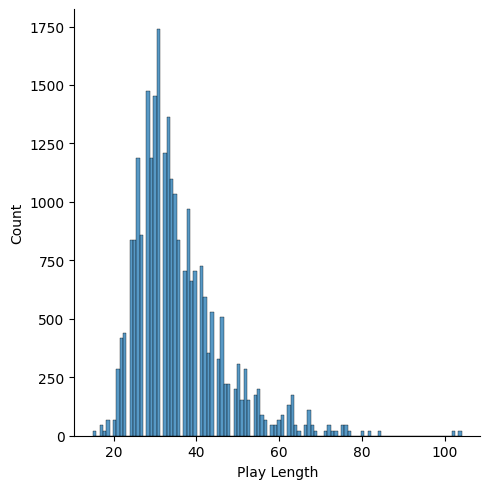

In [49]:
seq_play_list = []
for seq in sequences:
    seq_play_list.append(len(seq))
seq_play_df = pd.DataFrame(seq_play_list,columns=["Play Length"])
sb.displot(seq_play_df,x="Play Length")


### Padding Model Input Array

Here we use the built in preprocessing function "pad_sequences" to pad our sequences to a uniform length. Above, we demonstrated a 43 frame sequence corresponding to the tracking data for a given play and player in a game. However, sequences in our dataframe will not always be this length due to the varying duration of football plays. Therefore, we add this preprocessing step to ensure our sequences are of an equal length to feed them into our model. The value that we are using to pad the sequences is an array of size 12 (same size as the elements of the sequence as shown above) with entries of -1 (Should this be changed?). We also specify that the padding values will be added to the end of each sequence, since we will be standardizing plays to start at a particular number of frames before our ball_snap event. Here we show the same entry as above after padding.

In [16]:


padded_ip = tf.keras.preprocessing.sequence.pad_sequences(seq,padding = 'post',value=[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
print(padded_ip[0])
print("\n\n -- Number of standardized entries in a sequence --")
print(len(padded_ip[0]))

[[  7  12  29 ... 137 272   0]
 [  8  12  29 ... 131 267   0]
 [  9  12  29 ... 129 263   0]
 ...
 [ -1  -1  -1 ...  -1  -1  -1]
 [ -1  -1  -1 ...  -1  -1  -1]
 [ -1  -1  -1 ...  -1  -1  -1]]


 -- Number of standardized entries in a sequence --
103


### Expanding Input Dimensions with NumPy for Masking Layer

In [17]:
padded_expanded_ip = np.expand_dims(padded_ip,-1)
padded_expanded_ip.shape

(25783, 103, 12, 1)

### Converting Input to Tensor for Masking Layer

In [18]:
tf_ip = tf.convert_to_tensor(padded_expanded_ip,dtype='float32')

### Creating a Masking Layer

Here we create our masking layer, specifying our mask value which we used above to pad our input sequences.

In [19]:
masking_layer = tf.keras.layers.Masking(mask_value=-1.0)
masking_layer
#print(masked_output._keras_mask)

### Passing Input Data to Masking Layer

Here we pass in our input tensor to the masking layer and print out the masked data. This demonstrates the values that were masked (which should correspond to the values we added when padding our sequences). This masking layer will allow our model to ignore these padded features.

In [20]:
masked_data = masking_layer(tf_ip)
masked_data

<tf.Tensor: shape=(25783, 103, 12, 1), dtype=float32, numpy=
array([[[[  7.],
         [ 12.],
         [ 29.],
         ...,
         [137.],
         [272.],
         [  0.]],

        [[  8.],
         [ 12.],
         [ 29.],
         ...,
         [131.],
         [267.],
         [  0.]],

        [[  9.],
         [ 12.],
         [ 29.],
         ...,
         [129.],
         [263.],
         [  0.]],

        ...,

        [[ -0.],
         [ -0.],
         [ -0.],
         ...,
         [ -0.],
         [ -0.],
         [ -0.]],

        [[ -0.],
         [ -0.],
         [ -0.],
         ...,
         [ -0.],
         [ -0.],
         [ -0.]],

        [[ -0.],
         [ -0.],
         [ -0.],
         ...,
         [ -0.],
         [ -0.],
         [ -0.]]],


       [[[  7.],
         [ 87.],
         [ 29.],
         ...,
         [ 82.],
         [ 56.],
         [  0.]],

        [[  8.],
         [ 87.],
         [ 29.],
         ...,
         [ 73.],
         [ 51.]

In [21]:
print(masked_data._keras_mask[0][44])

tf.Tensor([False False False False False False False False False False False False], shape=(12,), dtype=bool)


- How do we want to incorporate the data of the player being defended?
- Are there any additional features from other data necessary?
- Advance to training the model or further analysis on data features or EDA? 
- For the model, single step/multi step? Single shot or autoregressive, etc...
- Interim Report due Dec 7th

- Get the distribution of plays after the ball snap
- Cut the prior frames of ball_snap fully
- Isolation of pairs: TE,WR,SS,FS,CB,DB

For the interim report:
- Design decisions
- Data limitations
- Talk about the next training steps, combination of o data and defensive response

Keep team,x,y,speed,orientation,event

Analyze events after removing pre ball_snap


In [22]:
player_data['officialPosition'].unique()

array(['QB', 'T', 'TE', 'WR', 'DE', 'SS', 'C', 'FS', 'NT', 'DT', 'CB',
       'G', 'OLB', 'RB', 'MLB', 'ILB', 'LB', 'FB', 'DB'], dtype=object)